<img src="images/header.png">

# Алгоритмы интеллектуальной обработки больших объемов данных

## Лекция 5. Классификация и регрессия 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Сегодня на лекции

* Пример проекта с использованием машинного обучения
* Формальная постановка задач классификации и регрессии
* Оценка качеcтва классификации и регрессии

### Нужно отметиться на лекции

https://sphere.mail.ru/

## Этапы в типичном проекте с использованием машинного обучения

1. Обзор задачи
2. Сбор данных
3. Поиск в данных особенностей для лучшего понимания задачи 
4. Подготовка данных для использования в алгоритмах машинного обучения
5. Выбор наилучших моделей из множества рассматриваемых
6. Тонкая настройка моделей для достижения наилучшего результата
7. Презентация решения
8. Внедрение, запуск, поддержка, мониторинг системы

<img src='images/timing.png'>

## Обзор задачи
1. Определить цель в бизнес терминах
2. Как решение будет использоваться?
3. Какие решения есть на данный момент (если есть)?
4. Какой класс задач (с учителем или без, онлайн или оффлайн, и пр.)?
5. Как измеряется качество?
6. Связано ли измерение качества с бизнес целью?
7. Есть ли минимальный порог качества, необходимый для достижения бизнес цели?
8. Существуют ли похожие решенные задачи? Можно ли их использовать?
9. Есть ли человеческий опыт?
10. Как бы решалась проблема ручным трудом?
11. Список всех принятых допущений
12. Проверка принятых допущений

### Цены на недвижимость 

#### [California Housing data set](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

1. Будем предсказывать цену на недвижимость и использовать ее в другой системе машинного обучения для принятия решения о инвестициях
2. На данный момент решение о цене принимают эксперты и они ошибаются в 15% случаев
3. Какой класс задач?

## Задачи классификации и регрессии
<img src="images/omnomnom.jpg">

## Классификация: интуиция
#### Задача
Разработать алгоритм, позволяющий определить класс произвольного объекта из
некоторго множества
* Дана обучающая выборка, в которой для каждого объекта известен класс

## Регрессия: интуиция
#### Задача
Разработать алгоритм, позволяющий предсказать числовую характеристику
произвольного объекта из некоторого множества
* Дана обучающая выборка, в которой для каждого объекта известно значение
числовой характеристики

## Обучение с учителем / supervised learning

**Дано.** Признаковые описания $N$ объектов $\mathbf{x} = (x_1, \ldots, x_m) \in \mathcal{X}$, образующие тренировочный набор данных $X$, и значения целевой переменной $y = f(\mathbf{x}) \in \mathcal{Y}$ для каждого объекта из $X$. 

**Найти.** Для семейства параметрических функций 
$$
H = \{h(\mathbf{x, \mathbf{\theta}}) = y: \mathcal{X} \times \Theta \rightarrow \mathcal{Y}\},
$$
найти значение вектора параметров $\theta^*$, такое что $h^*(\mathbf{x}) = h(\mathbf{x}, \theta^*)$ наилучшим образом приближает целевую функцию.

$Y \in \{C_1, C_2, \ldots, C_N\}$ - задача классификации  
$Y \in [a, b] \subset \mathcal{R}$ - задача регресии

### $L = R + E + O$

* **R** Выдвигаем гипотезу насчет **модели** - семейства параметрических функций вида
$$
H = \{h(\mathbf{x}, \theta) = y: \mathcal{X} \times \Theta \rightarrow \mathcal{Y} \},
$$
которая могла бы решить нашу задачу (represenation)

* **E** Выбиаем критерий, на основании которого будем оценивать качество предсказания (evaluation)

* **O** Выбираем наилучшие параметры модели $\theta^*$, используя **алгоритм обучения**
$$
A(X, Y) : (\mathcal{X}, \mathcal{Y})^N \rightarrow \Theta
$$
(optimization)

* **D** Используя полученную модель $h^*(\mathbf{x}) = h(\mathbf{x}, \theta^*)$, решаем, как классифицировать неизвестные объекты (decision making)



## Метрики качества

## Эмпирический риск

* **Функция потерь** $\mathcal{L}(\mathbf{x}, y, \theta)$ - ошибка, которую для данного $\mathbf{x}$ дает модель $h(\mathbf{x}, \theta)$ по сравнению с реальным значением $y$

* **Эмпирический риск** - средняя ошибка на обучающей выборке
$$
Q(X, Y, \theta) = \frac{1}{N} \sum_{n=1}^N \mathcal{L}(\mathbf{x}_n, y_n, \theta)
$$

* **Задача** - найти значение $\theta^*$, минимизирующее эмпирический риск
$$
\theta^* = \theta^*(X, Y) = \text{argmin}_\theta Q(X, Y, \theta)
$$

## Метрики качества. Регрессия

$$
MSE = \frac 1 N \sum (h(\mathbf{x}_i) - y_i)^2, \;\; RMSE = \sqrt{MSE}
$$
$$
MAE =  \frac 1 N \sum |h(\mathbf{x}_i) - y_i|, \;\; RMAE = \sqrt{MAE}
$$

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Метрики качества. Классификация


* Индикатор ошибки
$$
\mathcal{L}(\mathbf{x}, y, \theta) = 0 \text{ if } h(\mathbf{x}, \theta) = y \text{ else } 1
$$
* Функция Минковского 
$$
\mathcal{L}(\mathbf{x}, y, \theta) = |y - h(\mathbf{x}, \theta)|^q
$$
Частные случаи: квадратичная $q = 2$, абсолютная ошибка $q = 1$
* Hinge
$$
\mathcal{L}(\mathbf{x}, y, \theta) = \max(0, 1 - y \times h(\mathbf{x}, \theta))
$$
* Информационная
$$
\mathcal{L}(\mathbf{x}, y, \theta) = - \log_2 p(y | \mathbf{x}, \theta)
$$



http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## Сбор данных
1. Собрать список необходимых данных и определиться с объемами
2. Определить и документировать сбор данных
3. Узнать, какой объем памяти понадобится для хранения и обработки данных
4. Проверить права по использованию данных
5. Получить доступы к данным
6. Создать рабочее окружение
7. Собрать данные
8. Сконвертировать данные в формат, пригодный для использования
9. Убедиться, что нет чувствительных данных (пароли и пр.)
10. Проверить объемы и типы данных
11. Выделить тестовый набор данных и не использовать его для обучения (вообще, совсем, никогда-никогда)

In [3]:
import sklearn.datasets.california_housing as ch
import mpl_toolkits.basemap as bm
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
dataset = ch.fetch_california_housing()

X = dataset.data
Y = dataset.target

print "Loaded data set with %d objects and %d variables" % (Y.shape[0], X.shape[1])
print "Coordinates ll=(%.3f, %3.f), ur=(%.3f, %.3f)" % (X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max())

Loaded data set with 20640 objects and 8 variables
Coordinates ll=(-124.350,  33), ur=(-114.310, 41.950)


In [5]:
dataset.data.shape

(20640, 8)

In [6]:
dataset.target.shape


(20640,)

In [7]:
data = np.hstack((dataset.data, dataset.target.reshape(dataset.target.shape[0], 1)))

In [8]:
data.shape

(20640, 9)

In [9]:
print dataset.DESCR

print dataset.feature_names

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
housing = pd.DataFrame(data, columns=dataset.feature_names + ['median_house_value'])
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc                20640 non-null float64
HouseAge              20640 non-null float64
AveRooms              20640 non-null float64
AveBedrms             20640 non-null float64
Population            20640 non-null float64
AveOccup              20640 non-null float64
Latitude              20640 non-null float64
Longitude             20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


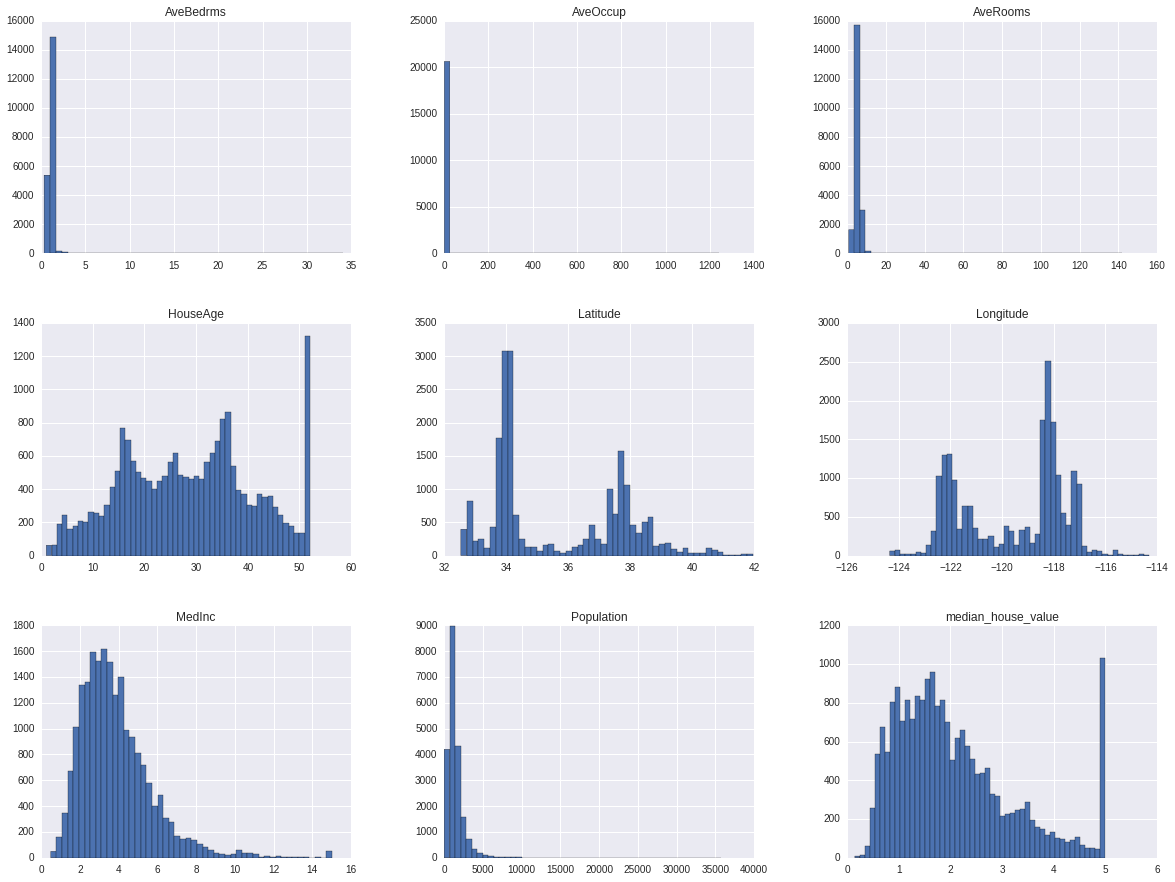

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

(16512, 'train +', 4128, 'test')


Какая проблема возникнет при таком разделении?

Реализуйте лучшее разделение  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn-model-selection-stratifiedshufflesplit

## Зачем разделять? Проблема переобучения

## Переобучение

<img src="images/m1.png">
<img src="images/m2.png">
<img src="images/m3.png">
<img src="images/of.png">



## Поиск особенностей в данных

1. Создать копию данных при необходимости (семпл)
2. Использовать любую систему контроля версий для сохранения прогресса
3. Изучить все атрибуты:
    * имя
    * тип (категориальный, целый/вещественный, ограниченный/неограниченный, текстовый, пр.)
    * % отсутствующих данных
    * зашумленность и тип шума (случайный, выбросы, пр.)
    * потенциальная польза для решения
    * тип распределения (нормальное, равномерное, пр.)
4. Для обучения с цчителем выделить целевую переменную
5. Визуализировать данные
6. Изучить корреляции между атрибутами
7. Изучить, как проблема бы решалась ручным трудом
8. Определить необходимые преобразования в данных
9. Определить, есть ли дополнительные данные, которые могут быть полезными
10. Все документировать

In [14]:
housing = train_set.copy()

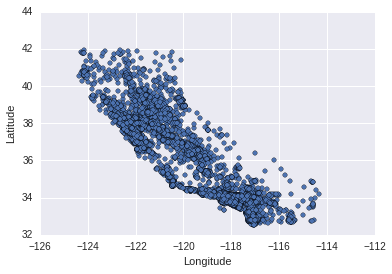

In [15]:
housing.plot(kind="scatter", x="Longitude", y="Latitude")

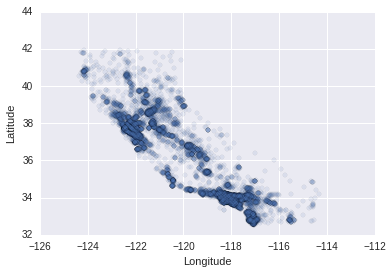

In [16]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

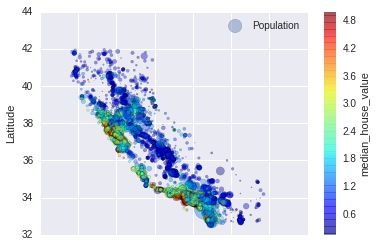

In [17]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=housing["Population"]/100, label="Population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

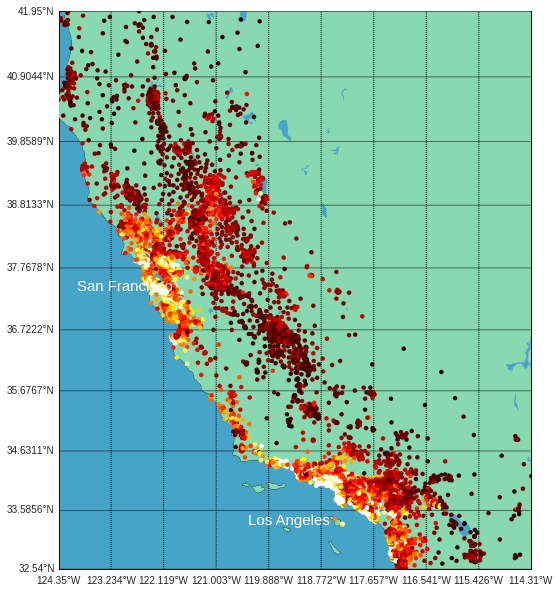

In [32]:
pl.figure(figsize=(10, 10))

lllon, lllat, urlon, urlat = X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max()

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y.min()) / (Y.max() - Y.min()) * 256)) for y in Y]
m.scatter(X[:, -1], X[:, -2], latlon=True, zorder=3, lw=0, c=colors)

pl.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
MedInc                0.690039
AveRooms              0.152744
HouseAge              0.103744
Population           -0.015426
AveOccup             -0.037785
Longitude            -0.049992
AveBedrms            -0.054210
Latitude             -0.141489
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4194fadad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f41959a4750>]], dtype=object)

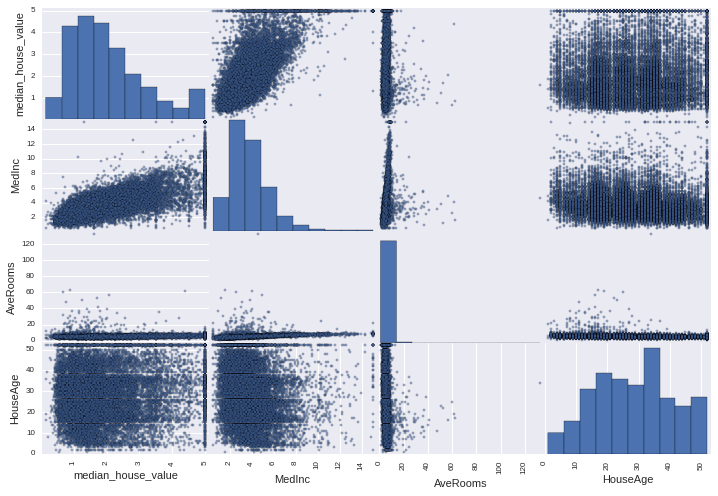

In [21]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "MedInc", "AveRooms", "HouseAge"]
scatter_matrix(housing[attributes], figsize=(12, 8))

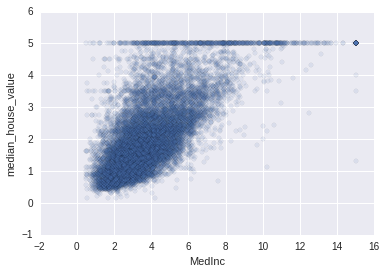

In [22]:
housing.plot(kind="scatter", x="MedInc", y="median_house_value", alpha=0.1)

## Подготовка данных для использования в модели
* Работать с копией данных (исходные данные оставлять без изменений)
* Писать функции для всех преобразований данных
    * Применять те же самые преобразования на новых данных
    * Применять те же самые преобразования в будущем в других проектах
    * Применять на тестовом сете
    * Выбирать преобразования так же, как параметры алгоритма
* Очистка данных
    * Исправление выбросов
    * Заполнение отсутствующих значений
* Отбор признаков
    * Уменьшение размерности данных
* Подбор признаков
    * Перевод непрерывных величин в дискретные
    * Перевод нечисловых признаков в числовые
    * Преобразование признаков - логарифмизация и пр.
    * Выделение новых признаков на основе существующих
* Масштабирование признаков - стандартизация, нормализация и пр.

In [23]:
housing.count()

MedInc                16512
HouseAge              16512
AveRooms              16512
AveBedrms             16512
Population            16512
AveOccup              16512
Latitude              16512
Longitude             16512
median_house_value    16512
dtype: int64

In [24]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.857958,28.607316,5.425187,1.096887,1423.720446,2.986569,35.630406,-119.567806,2.061756
std,1.882061,12.563857,2.357345,0.463860,1124.125417,4.417234,2.133063,2.002498,1.148374
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.559100,18.000000,4.436599,1.006100,788.000000,2.429003,33.930000,-121.800000,1.188000
50%,3.528800,29.000000,5.223123,1.048420,1167.000000,2.816617,34.260000,-118.500000,1.795000
75%,4.734400,37.000000,6.047884,1.099222,1726.000000,3.280111,37.710000,-118.000000,2.642000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,502.461538,41.950000,-114.310000,5.000010


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# выполните стандартизацию данных

## Выбор подходящих моделей

* Подготовка уменьшенной выборки данных для быстрого обучения моделей
* Автоматизация этих шагов
* Обучить много быстрых и простых моделей из разных категорий (линейные, наивный баейс, svm, случайных лес и др.) используя параметры по умолчанию
* Измерить и сравнить их качество
* Для каждой модели использовать N-fold cross-validation и вычислить среднее и стандартное отклонение метрики на N fjlds
* Проанализировать наиболее значимые переменные для каждого алгоритма
* Проанализировать типы ошибок в модели
* Провести быстрые эксперименты подбора признаков
* Сделать несколько итераций предыдущих шагов
* Составить список наилучших моделей

## Метод ближайших соседей

### K-Nearest Neighbours

* Representation:
$$
h(\mathbf{x}) = \frac{1}{K} \sum_{\mathbf{x}_k \in N_K(\mathbf{x})} f(\mathbf{x}_k)
$$

* Evaluation: любая

* Optimization: не требуется


In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housing_labels = housing['median_house_value'].copy()
housing_prepared = housing[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].copy()

X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.33, random_state=42)

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
housing_predictions = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

1.0813967380963962

In [40]:
Y_new = knn.predict(housing_prepared)
mean_squared_error(Y_new, housing_labels)

0.90937541134507549

In [42]:
housing_labels.head()

12495    1.575
5541     4.112
14405    5.000
14344    1.125
7610     1.019
Name: median_house_value, dtype: float64

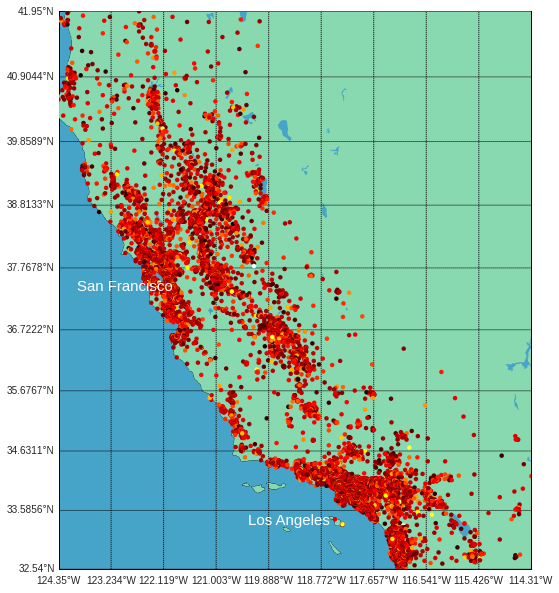

In [38]:
pl.figure(figsize=(10, 10))

lllon, lllat, urlon, urlat = X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max()

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y_new.min()) / (Y_new.max() - Y_new.min()) * 256)) for y in Y_new]
m.scatter(X[:, -1], X[:, -2], latlon=True, zorder=3, lw=0, c=colors)

pl.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

## Классификация с помощью метода ближайших соседей

<img src="images/knn_cls.png">



## Переобучение

### KNN

<img src="images/knn_cls.png">
<img src="images/knn_cls_1.png">
<img src="images/knn_tt.png">


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = range(20)

iris = datasets.load_iris()

X = iris.data[:, :2]  
y = iris.target

# 1. создайте объект классификатора и обучите его на датасете iris
# используйте KNeighborsClassifier

# 2. Разделите выборку на train и test части

# 3. Для всех n из n_neighbors обучите модель и посчитайте количество ошибок на train и на test частях

# 4. Нарисуйте график


## Representation: линейная модель

Идея: предположить, что искомая функция линейно зависит от признаков
$$
h(\mathbf{x}, \mathbf{w}) = \sum_{d=1}^D x_d w_d + w_0 = \mathbf{x}^T \mathbf{w} + w_0
$$
Добавим к $\mathbf{x}$ фиктивный компонент $x_0 = 1$
$$
h(\mathbf{x}, \mathbf{w}) = \sum_{d=0}^D x_d w_d = \mathbf{x}^T \mathbf{w},
$$
тогда для всего набора данных
$$
\mathbf{y}^T = \mathbf{x}^T \mathbf{w}
$$

или

$$
\mathbf{y} = \mathbf{w}^T \mathbf{x}
$$



$D$ - количество признаков  
$N$ - количество примеров в обучающем наборе

$\mathbf{x}$ - матрица размерности $D \times N$

$\mathbf{w}$ - вектор размерности $D$

$\mathbf{y}$ - вектор размерности $N$

## Evaluation: метод наименьших квадратов

Идея: выбрать веса так, чтобы сумма квадратов отклонений предсказаний от реальных значений была минимальной
$$
RSS(\mathbf{w}) = \sum_{n=1}^N (y_n - h(\mathbf{x}_n, \mathbf{w}))^2 = \sum_{n=1}^N (y_n - \mathbf{x}_n^T \mathbf{w})^2 \rightarrow \min_{\mathbf{w}}
$$



## Optimization: аналитически

$$
RSS(\mathbf{w}) = (Y - X^T \mathbf{w})^T (Y - X^T \mathbf{w})
$$
$$
\Downarrow
$$
$$
\mathbf{w} = (X^T X)^{-1} X^T Y
$$


## Нелинейные зависимости

Перейдем в новое пространство признаков
$$
\mathbf{x} = (x_1, x_2, \ldots, x_{D})
$$
$$
\downarrow
$$
$$
\mathbf{z} = (x_1, x_2, \ldots, x_D, x_1^2, x_1 x_2, x_1 x_3, \ldots,  x_{D-1} x_D, x_D^2, \ldots)
$$
и сможем приближать сложные нелинейные функции

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housing_labels = housing['median_house_value'].copy()
housing_prepared = housing[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].copy()

X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.33, random_state=42)

# 1. Постройте линейнeйную регрессию и оцените качество - LinearRegression
# 2. Постройте полиномиальную регресиию и оцените качество - PolynomialFeatures + LinearRegression

## Классификация с помощью метода наименьших квадратов

$$
\text{Пусть }\mathcal{Y} = \{0, 1\}, \text{ тогда } \begin{cases}
\text{классифицируем 1, если }h^*(\mathbf{x}) \geq 0.5 \\
\text{классифицируем 0, если }h*(\mathbf{x}) < 0.5
\end{cases}
$$

<img src="images/lr_cls.png">


Тонкая настройка

* Использовать как можно больше данных
* Автоматизировать все, что можно
* Подбирать параметры на кросс-валидации
* Эвристики о преобразовании признаков принимать как гиперпараметры модели
* Использовать поиск параметров по сетке и случайный
* Проверить работу ансамблей
* После выбора модели, проверить ее на отложенной выборке (менять параметры модели при этом нельзя)

## Как оценить различные модели?

**Идея**  
использовать долю неверно классифицированных объектов  
error rate)

**Важное замечание**  
error rate на обучающей выборке *НЕ* является хорошим показателем качества модели


## Решение 1: разделение выборки

Делим обучающую выборку на **тренировочную**, **валидационную** и **тестовую**
<img src="images/vtt.png">


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import neighbors

iris = datasets.load_iris()
print 'dataset: data shape {}, target shape {}'.format(iris.data.shape, iris.target.shape)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

print 'train data: data {}, target {}'.format(X_train.shape, y_train.shape)

print 'test data: data {}, target {}'.format(X_test.shape, y_test.shape)

clf = neighbors.KNeighborsClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)                           

dataset: data shape (150, 4), target shape (150,)
train data: data (90, 4), target (90,)
test data: data (60, 4), target (60,)


0.94999999999999996

## Решение 2: скользящий контроль

(n-times) (stratified) cross-validation
<img src="images/cv.png">
частный случай: leave-one-out

In [16]:
from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier()
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
Accuracy: 0.97 (+/- 0.05)


In [1]:
# Подберите параметры knn регрессии для housing с помощью GridSearchCV кросс-валидации

## Метрики качества. Функции решения.

<table>
<tr>
    <td></td>
    <td></td>
    <td>Предсказанный</td>
    <td></td>
</tr>
<tr>
    <td></td>
    <td></td>
    <td>true</td>
    <td>false</td>
</tr>
<tr>
    <td>Действительный</td>
    <td>true</td>
    <td>TP</td>
    <td>FN</td>
</tr>
<tr>
    <td></td>
    <td>false</td>
    <td>FP</td>
    <td>TN</td>
</tr>
</table>


$$
success\;rate = accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$
$$
recall = TPR = \frac{TP}{TP + FN};\;\;precision = \frac{TP}{TP + FP}
$$
$$
FPR = \frac{FP}{FP + TN}
$$
$$
affinity = lift = \frac{precision}{p}
$$



## Receiver Operating Characteristic

$$
TPR = \frac{TP}{TP + FN};\;\;FPR = \frac{FP}{FP + TN}
$$

<img src="images/roc.png">


## Презентация своего решения
1. Документация проделанной работы
2. Красивая презентация
    * Правильно расставленные акценты
3. Описать решение в соответствии с бизнес целью
4. Рассказать о полученных знаниях в процессе работы с данными
    * Описать, что сделано, и что не сделано
    * Описать допущения и ограничения разработанной системы
5. Убедиться, что ключевые утверждения описаны и визуализированы простым и наглядным образом

## Запуск системы
1. Подготовить решение для использования в боевом окружении (реализовать преобразования данных, написать юнит-тесты)
2. Настроить мониторинг - следить за качеством модели на регулярной основе и сообщать о проблемах любым способом
    * Помнить об ухудшении качества модели со временем
    * Следить за качеством входных данных
3. Периодически обучать новую модель на новых данных - автоматизировать как можно больше

### Вопросы
### Пожалуйста, напишите отзыв о лекции